# Big Data Machine Learning Classification with Spark

In [1]:
import pandas as pd

In [2]:
pip install pyspark

In [3]:
from pyspark.ml.classification import GBTClassifier

### import data

In [4]:
df=pd.read_csv('churn.csv')

### EDA

In [5]:
df.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [8]:
df.sample()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
765,David Bowers,49.0,12893.19,0,5.13,7.0,0


In [9]:
df.shape

(900, 7)

In [10]:
df.corr(numeric_only=True)

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
Age,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926
Total_Purchase,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031
Account_Manager,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611
Years,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329
Num_Sites,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398
Churn,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 49.3+ KB


In [12]:
df.isnull().sum()

,0
Names,0
Age,0
Total_Purchase,0
Account_Manager,0
Years,0
Num_Sites,0
Churn,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<Axes: >

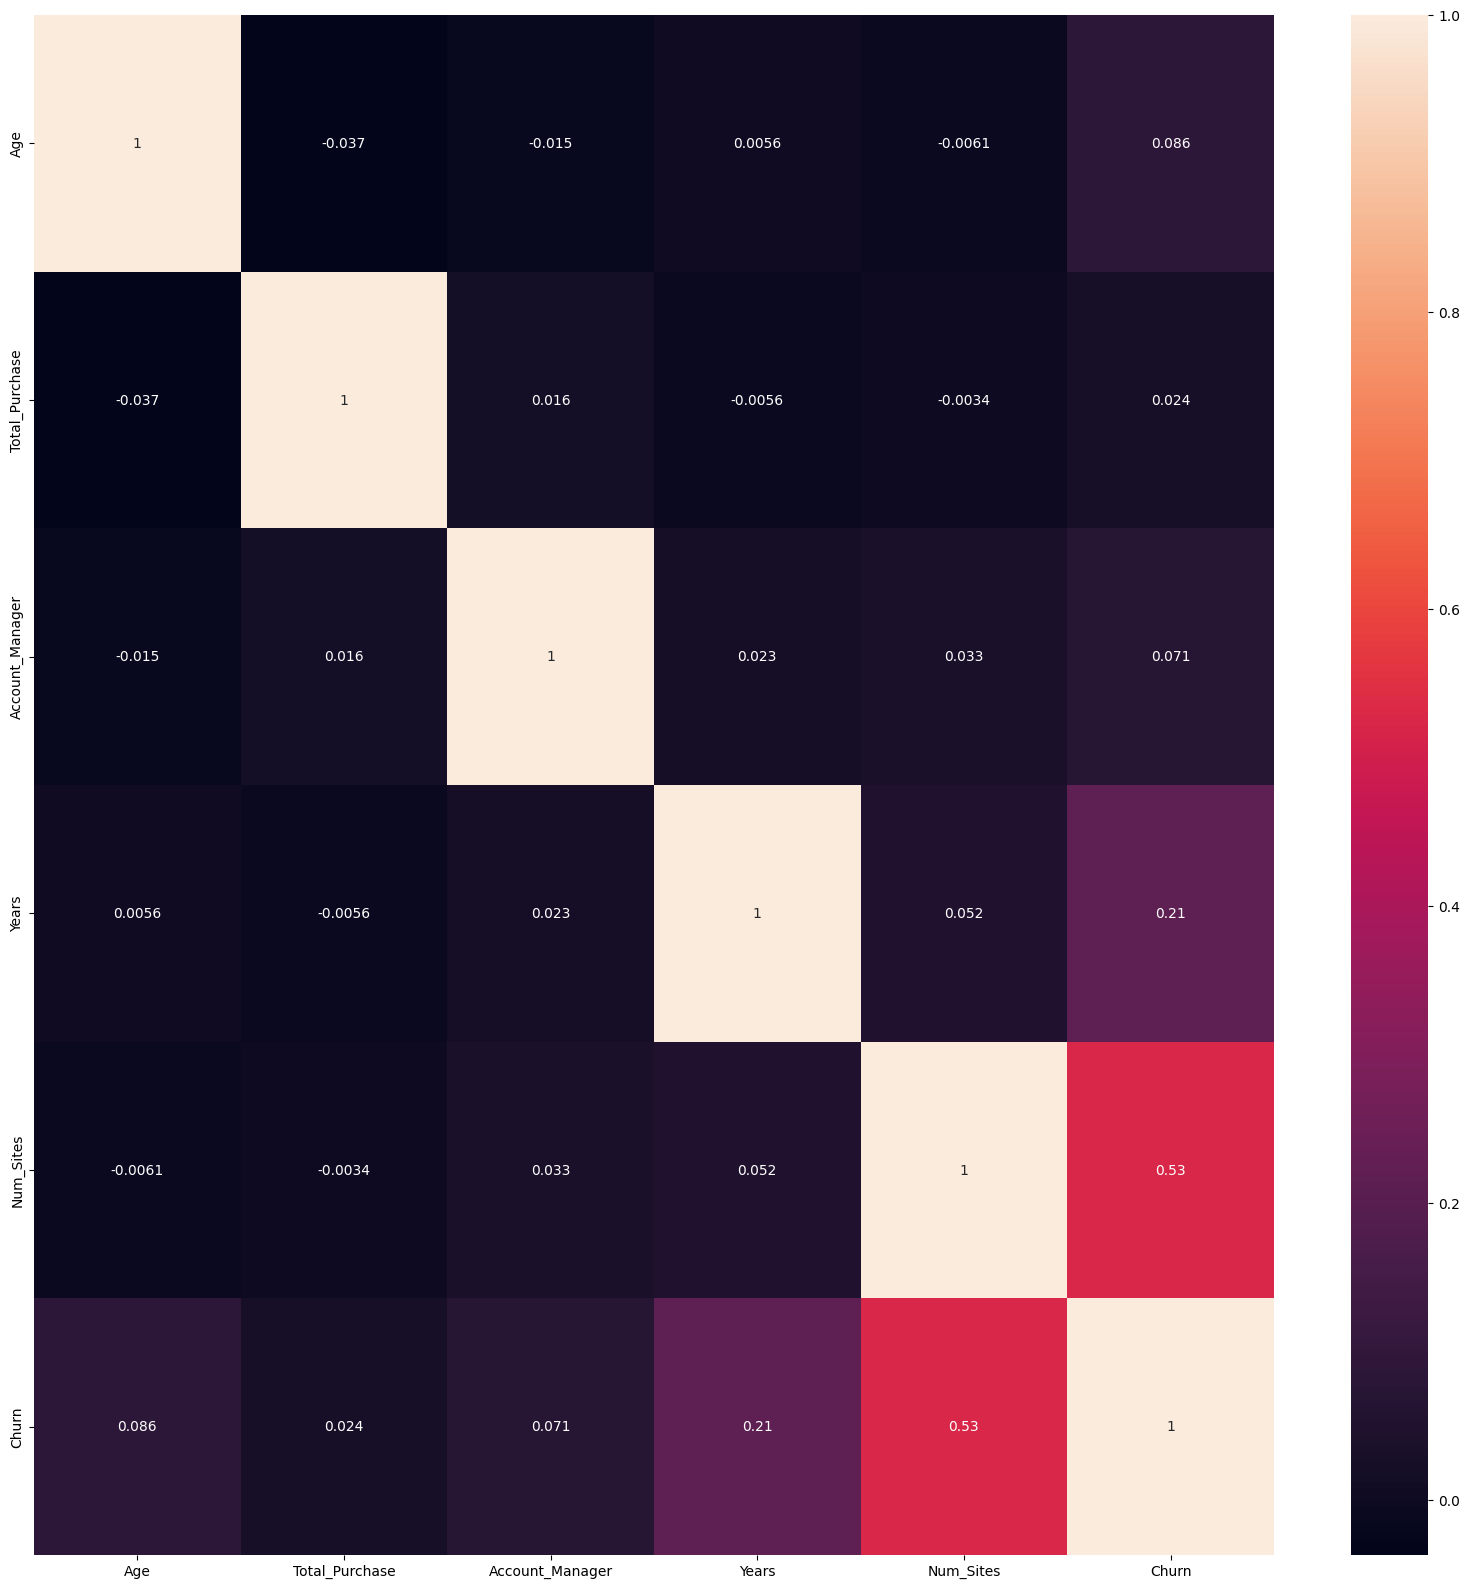

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [15]:
abs(df.corr(numeric_only=True)['Churn'].sort_values(ascending=False))

,Churn
Churn,1.000000
Num_Sites,0.525398
Years,0.214329
Age,0.085926
Account_Manager,0.070611
Total_Purchase,0.024031


In [21]:
pip install summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


In [22]:
from summarytools import dfSummary

In [23]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Names[object],1. Jennifer Wood2. Mary Marshall3. Thomas Campbell4. Christopher Clark5. Rose White6. Derek Martinez7. Wendy Key8. Lisa Fisher9. Kyle Hinton10. Travis Howell11. other,2 (0.2%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)889 (98.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1xJREFUeJzt3MFpG2EURtE3Rjj2RkIYXELSg4tIsSlCRaQHYzyL2PFmskgWKSDcAeWcCv7FhYdgPi3btg0UbvZ+AP8PsZERGxmxkREbGbGRERsZsZERGxmxkblZluXLsix3ez+E63czM59n5tPeD+H6OaNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuZmZr7PzM+9H8L1W/yLERVnlIzYyFhXkbGuIuOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzYyFhXkbGuIuOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMsvM3M/M7d4P4ap9bNv2dnh4ePh6PB7Pe7+G67Wu68uyLN8Ox+Px/PT09HY6nd73fhTX5/X19e5yuZyfn59vDzMzp9Pp/fHx8cfeD+Nq3c/4gUBIbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmMPP7M5C9H8J1+rutw7quL5fL5Tx/PgOBf21d15eZ+fBZOIWPbdverKvI+IFARmxkxEZGbGTERkZsZMRGRmxkxEbmF8IHaTn++fMrAAAAAElFTkSuQmCC"">",0(0.0%)
2,Age[float64],Mean (sd) : 41.8 (6.1)min < med < max:22.0 < 42.0 < 65.0IQR (CV) : 8.0 (6.8),36 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAApNJREFUeJzt3btuGkEYhuFvgkELKIsQEnTcQKQUlFxELjZtuhQUqbkDGoRAHMTGhNOmRsJO2FnM/MP79CNP8cr24H88Ls9zAaH79OgNAP/j5dEbCJVzri6pVnD5Ps/z1zL38+wI9QrnXL3T6XxL07RdZP1ms1k6574Ta3kI9bpamqbt4XD42mq1drcsXK/XyWg0ai8Wi5okQi0Job6j1Wrtut3u7wJL66Vv5slxmIIJ0X5H9TwMpefzuVrmfuAnylB9D0OHwyE5nU5fdrvdT0lFfvSjZFGGKo/DkCRNJpP2eDxuHI/Hyj02h9vFGqqk4oeh5XLJYSgwHKZgAqHCBEKFCYQKEwgVJkR96n+U0+lUlZQ654osZ/LqCkItWZZl1cPh8LXf71cqlcrNn+EyeXUdoZZsv9+/JEnSGAwGu16vt7xlLZNXbyPUO2k2m0xelYjDFEwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYz5BcbzdoAU6Q0BQg2I7+0AKd4bAoQaEJ/bAVLcNwQINUAetwOkSG8IcJiCCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYE/bd+j9f3eHkvMsGG6vP6Hi/vxSfYUOXx+h4v78Un5FAlFXt9j5f34sNhCiYQKkwgVJhAqDCBUGECocKE4D+ewm1ifd6SUCMS8/OWhBqRmJ+3vGuoHkMlEoMlhcX4vOXdQvUZKpEYLMGle35HLTxUIjFYgkt3/x21yFCJxGAJLvE5KkwgVJjwzx/9XAd5HiH/t+t3Qy3jOsh8Pv9VZGPb7TaRpCzLktls1viotY/82o/c93Q6/ez7365Xq9XWOfdDUpH1f/I8f3PdXytaU3nvXMxKAAAAAElFTkSuQmCC"">",0(0.0%)
3,Total_Purchase[float64],Mean (sd) : 10062.8 (2408.6)min < med < max:100.0 < 10045.9 < 18026.0IQR (CV) : 3263.0 (4.2),900 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqFJREFUeJzt3b2O2kAUQOE78UIMJLYACTpeIFIKSvq0edg8QgqK1LwBDUIgBMJZC2OcKlFWIj/M2Mvc4Xz9LC6OVrI9c22qqhLAd2/ufQHA/3i69wWEyBjTEZG25fJTVVXPdV5PCAi1ZsaYznA4/JwkSd9m/eFw2BljvhDrS4Rav3aSJP3ZbPacpml+y8L9fh/P5/P+drttiwih/oZQG5KmaT4ajb5bLO3UfjEB4GYKKhAqVCBUqECoUIFQoQKhQgUeT/2Bw9ul5HK5tOq+nkdHqFe4vF0qiiIuy/JDnudfRcTmOSquINTrrN8uLZfL/mKx6J7P56ipi3tEhPoXNm+Xdrud05ulsixbIpIYY2z/RJCbWgjVI1mWtYqi+DiZTKIoim76T/5TqJtaCNUjp9PpKY7j7nQ6zcfj8e7W9SFvaiFUD/V6PdsNLSKBbmrhOSpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjAUZTAOJ5i9fYEK6EGxPUUq88nWAk1IC6nWH0/wUqoAXI4xertCVZupqACoUIFQoUKhAoVCBUqECpUIFSoEOxzVMcvPDOH3zNBhur6hWfm8PsnyFDFYQa/CHP4fRRqqCJi/4Vn1zn8qB83U1CBUKECoUIFQoUKhAoVCBUq

In [24]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 53.0 MB/s eta 0:00:00


In [25]:
pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━

In [26]:
import dtale

/usr/local/lib/python3.12/dist-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [27]:
d=dtale.show(df)
d.open_browser()

### Modelling

In [31]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

spark = SparkSession.builder.appName("Sparklamüşterisiniflandirma").getOrCreate()

data = spark.read.csv("churn.csv", inferSchema=True,header=True)
data = data.drop("Names")
predictors = data.columns[:-1]
assembler = VectorAssembler(inputCols=predictors, outputCol="features")
data = assembler.transform(data).select("features", "Churn")

train_data, test_data = data.randomSplit([0.70, 0.30], seed=42)
GPT = GBTClassifier(labelCol="Churn", featuresCol="features")
model = GPT.fit(train_data)
predictions = model.transform(test_data)
evaluator = BinaryClassificationEvaluator(labelCol="Churn")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

spark.stop()

Accuracy: 0.9973262032085561
